In [1]:
from psycopg2 import connect
import psycopg2.sql as pg
import configparser
import datetime
%matplotlib inline
import numpy as np
import pandas as pd
import pandas.io.sql as pandasql
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set(color_codes=True)
from IPython.display import HTML
def print_table(sql, con):
    return HTML(pandasql.read_sql(sql, con).to_html(index=False))

In [2]:
CONFIG = configparser.ConfigParser()
CONFIG.read(r'/home/jchew/local/db.cfg')
dbset = CONFIG['DBSETTINGS']
con = connect(**dbset)

In [19]:
sql = pg.SQL('''
SELECT *
FROM congestion.tt_segments_baseline_v1''')
all_baseline = pandasql.read_sql(sql, con)

Text(0.5, 1.0, '10th Percentile vs Overnight Speed')

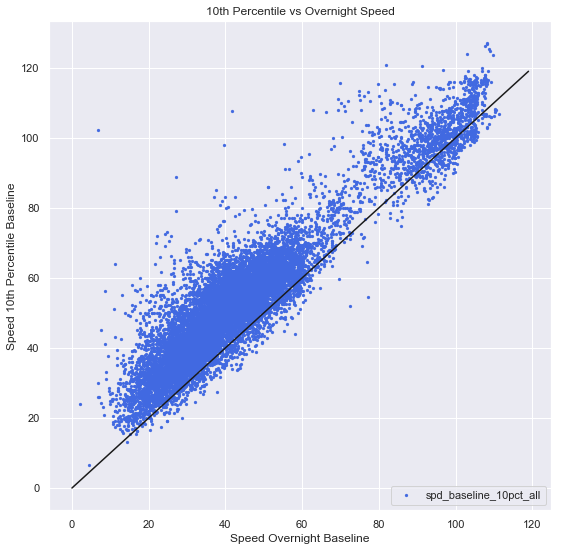

In [20]:
fig, ax = plt.subplots (1,1, figsize=(9,9))
    
ax.scatter(all_baseline['spd_baseline_overnight_all'], all_baseline['spd_baseline_10pct_all'], marker = '.', linewidths =0.25, c='royalblue')
ax.plot(range(0,120), range(0,120), '-', color = 'k')

ax.legend(loc = 4)
ax.set_xlabel('Speed Overnight Baseline')
ax.set_ylabel('Speed 10th Percentile Baseline')
ax.set_title('10th Percentile vs Overnight Speed')

In [18]:
sql = pg.SQL('''
(SELECT * FROM congestion.tt_segments_baseline_v1
ORDER BY spd_baseline_overnight_all LIMIT 10)
UNION 
(SELECT * FROM congestion.tt_segments_baseline_v1
WHERE spd_baseline_overnight_all IS NOT NULL
ORDER BY spd_baseline_overnight_all DESC LIMIT 10)
ORDER BY spd_baseline_overnight_all''')
segments_baseline = pandasql.read_sql(sql, con)
print_table(sql,con)

segment_id,seg_length,tt_baseline_overnight_all,tt_baseline_overnight_hc,spd_baseline_overnight_all,spd_baseline_overnight_hc,tt_baseline_10pct_all,tt_baseline_10pct_hc,spd_baseline_10pct_all,spd_baseline_10pct_hc
11849,137.000000,248.210932,249.340000,1.987020,1.978022,20.550000,21.443478,24.000000,23.000000
11857,247.000000,200.730986,200.730986,4.429809,4.429809,133.431638,NaN,6.664087,NaN
11764,137.000000,73.684833,76.700239,6.693372,6.430228,18.969231,18.969231,26.000000,26.000000
9080,242.000000,128.070000,128.070000,6.802530,6.802530,28.940014,97.812000,30.103649,8.906883
3582,196.000000,102.545317,39.674938,6.880860,17.784527,6.908863,6.703061,102.129688,105.265344
9078,198.000000,102.226364,NaN,6.972761,NaN,27.415385,73.450000,26.000000,9.704561
52,88.900456,42.636684,31.120856,7.506251,10.283831,7.112036,15.240078,45.000000,21.000000
9075,193.000000,92.113920,39.179244,7.542834,17.733880,28.683576,25.747542,24.222921,26.985101
8735,140.000000,63.256015,52.445236,7.967622,9.610024,21.865358,23.507692,23.050160,21.439791
9077,204.000000,87.683516,93.714286,8.375576,7.836585,35.415105,64.090909,20.736914,11.458723


Text(0.5, 0.98, 'Travel Time Overnight Baseline')

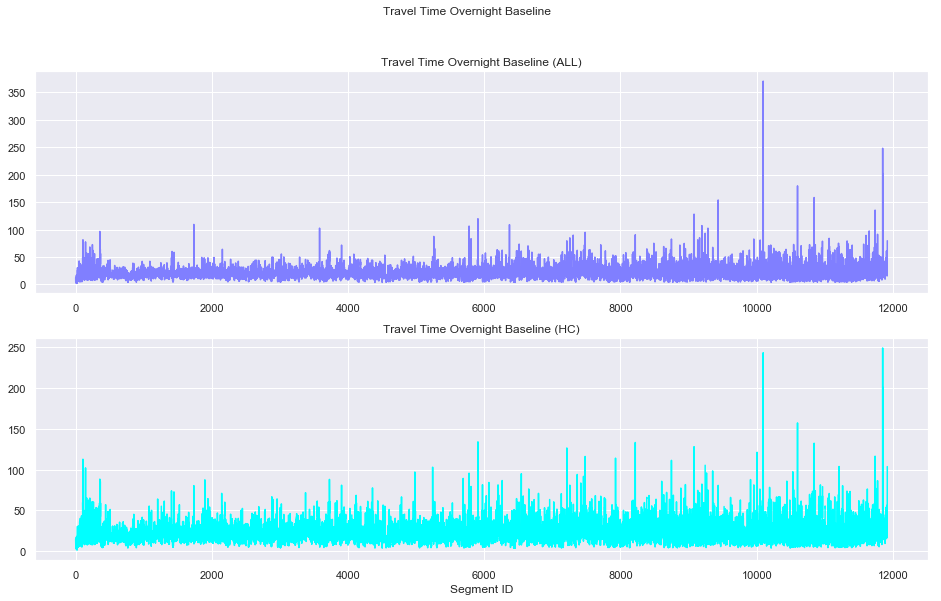

In [34]:
fig, ax = plt.subplots (2,1, figsize=(16,9))
NUM_COLORS = 2
cm = plt.get_cmap('cool')
bar_width = 0.3
colors = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

handles = []
ax[0].plot(all_baseline['segment_id'].values, all_baseline['tt_baseline_overnight_all'], color = colors[1], label="All")
handles.append(mpl.patches.Patch(color=colors[1], label= "All"))
# ax[0].set_xlabel('Segment ID')
ax[0].set_label('Travel Time')
ax[0].set_title('Travel Time Overnight Baseline (ALL)')

ax[1].plot(all_baseline['segment_id'].values, all_baseline["tt_baseline_overnight_hc"], color = colors[0], label="Confidence >= 30")
handles.append(mpl.patches.Patch(color=colors[0], label= "Confidence >= 30"))
ax[1].set_xlabel('Segment ID')
ax[1].set_label('Travel Time')
ax[1].set_title('Travel Time Overnight Baseline (HC)')

fig.suptitle('Travel Time Overnight Baseline')

Text(0.5, 0.98, 'Travel Time 10th Percentile Baseline')

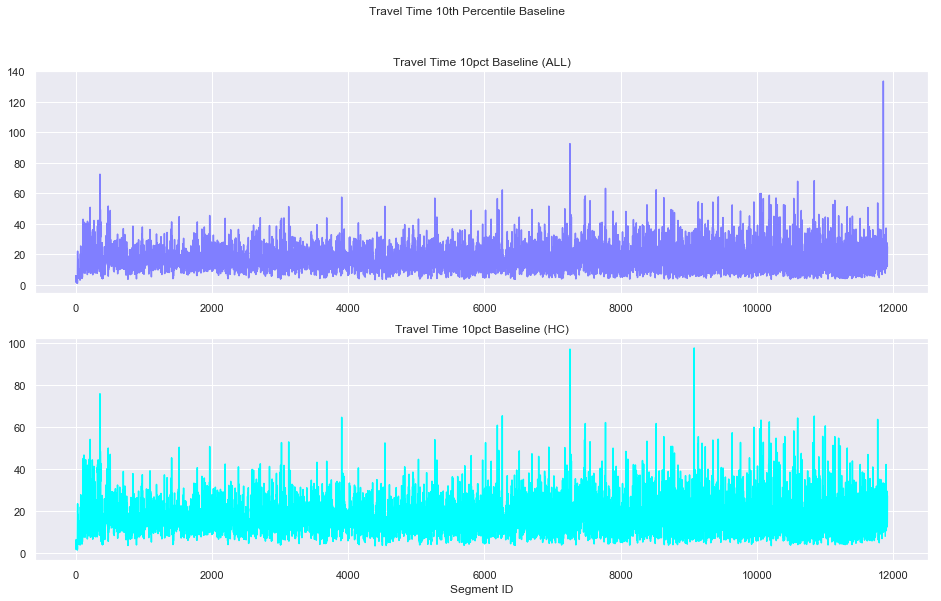

In [37]:
fig, ax = plt.subplots (2,1, figsize=(16,9))
NUM_COLORS = 2
cm = plt.get_cmap('cool')
bar_width = 0.3
colors = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

handles = []
ax[0].plot(all_baseline['segment_id'].values, all_baseline['tt_baseline_10pct_all'], color = colors[1], label="All")
handles.append(mpl.patches.Patch(color=colors[1], label= "All"))
# ax[0].set_xlabel('Segment ID')
ax[0].set_label('Travel Time')
ax[0].set_title('Travel Time 10pct Baseline (ALL)')

ax[1].plot(all_baseline['segment_id'].values, all_baseline["tt_baseline_10pct_hc"], color = colors[0], label="Confidence >= 30")
handles.append(mpl.patches.Patch(color=colors[0], label= "Confidence >= 30"))
ax[1].set_xlabel('Segment ID')
ax[1].set_label('Travel Time')
ax[1].set_title('Travel Time 10pct Baseline (HC)')

fig.suptitle('Travel Time 10th Percentile Baseline')

Text(0.5, 0.98, 'Speed Overnight vs 10th Percentile Baseline')

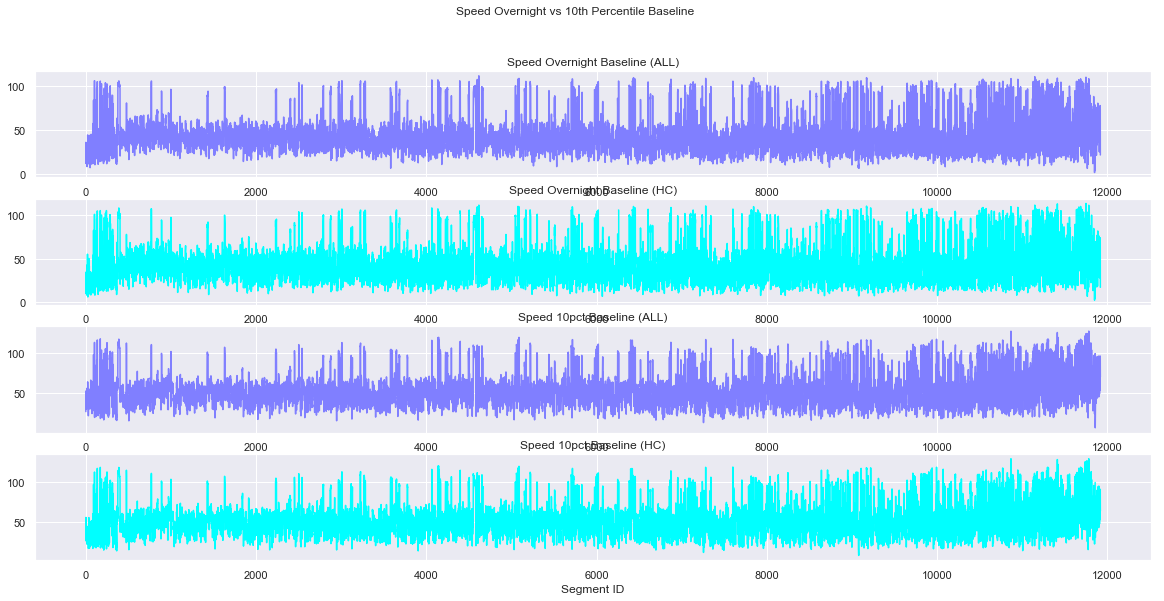

In [45]:
fig, ax = plt.subplots (4,1, figsize=(20,9))
NUM_COLORS = 2
cm = plt.get_cmap('cool')
bar_width = 0.3
colors = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

handles = []
ax[0].plot(all_baseline['segment_id'].values, all_baseline['spd_baseline_overnight_all'], color = colors[1], label="All")
handles.append(mpl.patches.Patch(color=colors[1], label= "All"))
ax[0].set_label('Speed')
ax[0].set_title('Speed Overnight Baseline (ALL)')

ax[1].plot(all_baseline['segment_id'].values, all_baseline["spd_baseline_overnight_hc"], color = colors[0], label="Confidence >= 30")
handles.append(mpl.patches.Patch(color=colors[0], label= "Confidence >= 30"))
ax[1].set_label('Speed')
ax[1].set_title('Speed Overnight Baseline (HC)')

ax[2].plot(all_baseline['segment_id'].values, all_baseline['spd_baseline_10pct_all'], color = colors[1], label="All")
handles.append(mpl.patches.Patch(color=colors[1], label= "All"))
ax[2].set_label('Speed')
ax[2].set_title('Speed 10pct Baseline (ALL)')

ax[3].plot(all_baseline['segment_id'].values, all_baseline["spd_baseline_10pct_hc"], color = colors[0], label="Confidence >= 30")
handles.append(mpl.patches.Patch(color=colors[0], label= "Confidence >= 30"))
ax[3].set_xlabel('Segment ID')
ax[3].set_label('Speed')
ax[3].set_title('Speed 10pct Baseline (HC)')

fig.suptitle('Speed Overnight vs 10th Percentile Baseline')